## Investigate the Different Aircraft in Delta’s Fleet

In [1]:
# Make sure you are running on Colab
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
#     !pip install yellowbrick
#     !pip install gower
#     !pip install scikit-learn-extra
#     !pip install kmodes

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import plotly.express as px
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore') # Ignore warnings

## Load the Delta Airline Data

Delta Airlines' website have data on all of their aircraft in a certain site section.
I would like to investigate the different aircraft in Delta’s fleet. Which planes are similar? Which are dissimilar?

In [3]:
# Load the data
delta_data = pd.read_csv('delta.csv', index_col=0).reset_index()

In [4]:
delta_data.head()

,Aircraft,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
1,Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.0,14,...,1,0,0,0,0,1,1,1,0,0
2,Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
3,Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
4,Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.0,32,...,1,1,0,1,0,0,0,1,1,1


In [7]:
delta_data.columns

Index(['Aircraft', 'Seat Width (Club)', 'Seat Pitch (Club)', 'Seat (Club)',
       'Seat Width (First Class)', 'Seat Pitch (First Class)',
       'Seats (First Class)', 'Seat Width (Business)', 'Seat Pitch (Business)',
       'Seats (Business)', 'Seat Width (Eco Comfort)',
       'Seat Pitch (Eco Comfort)', 'Seats (Eco Comfort)',
       'Seat Width (Economy)', 'Seat Pitch (Economy)', 'Seats (Economy)',
       'Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines',
       'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)', 'Wifi', 'Video',
       'Power', 'Satellite', 'Flat-bed', 'Sleeper', 'Club', 'First Class',
       'Business', 'Eco Comfort', 'Economy'],
      dtype='object')

### check correlation with visualization
Visualize pairwise correlation using scatterplot for columns ``'Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines', 'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)'`` (i.e., columns 16-23 in ``delta_data``)

In [8]:
delta_data.iloc[:, 16:23].head()

,Accommodation,Cruising Speed (mph),Range (miles),Engines,Wingspan (ft),Tail Height (ft),Length (ft)
0,126,517,2399,2,111.83,38.583,111.00
1,54,517,3119,2,111.83,38.583,111.00
2,150,517,2420,2,111.83,38.583,123.25
3,150,517,2420,2,111.83,38.583,123.25
4,243,531,6536,2,197.83,59.830,188.67


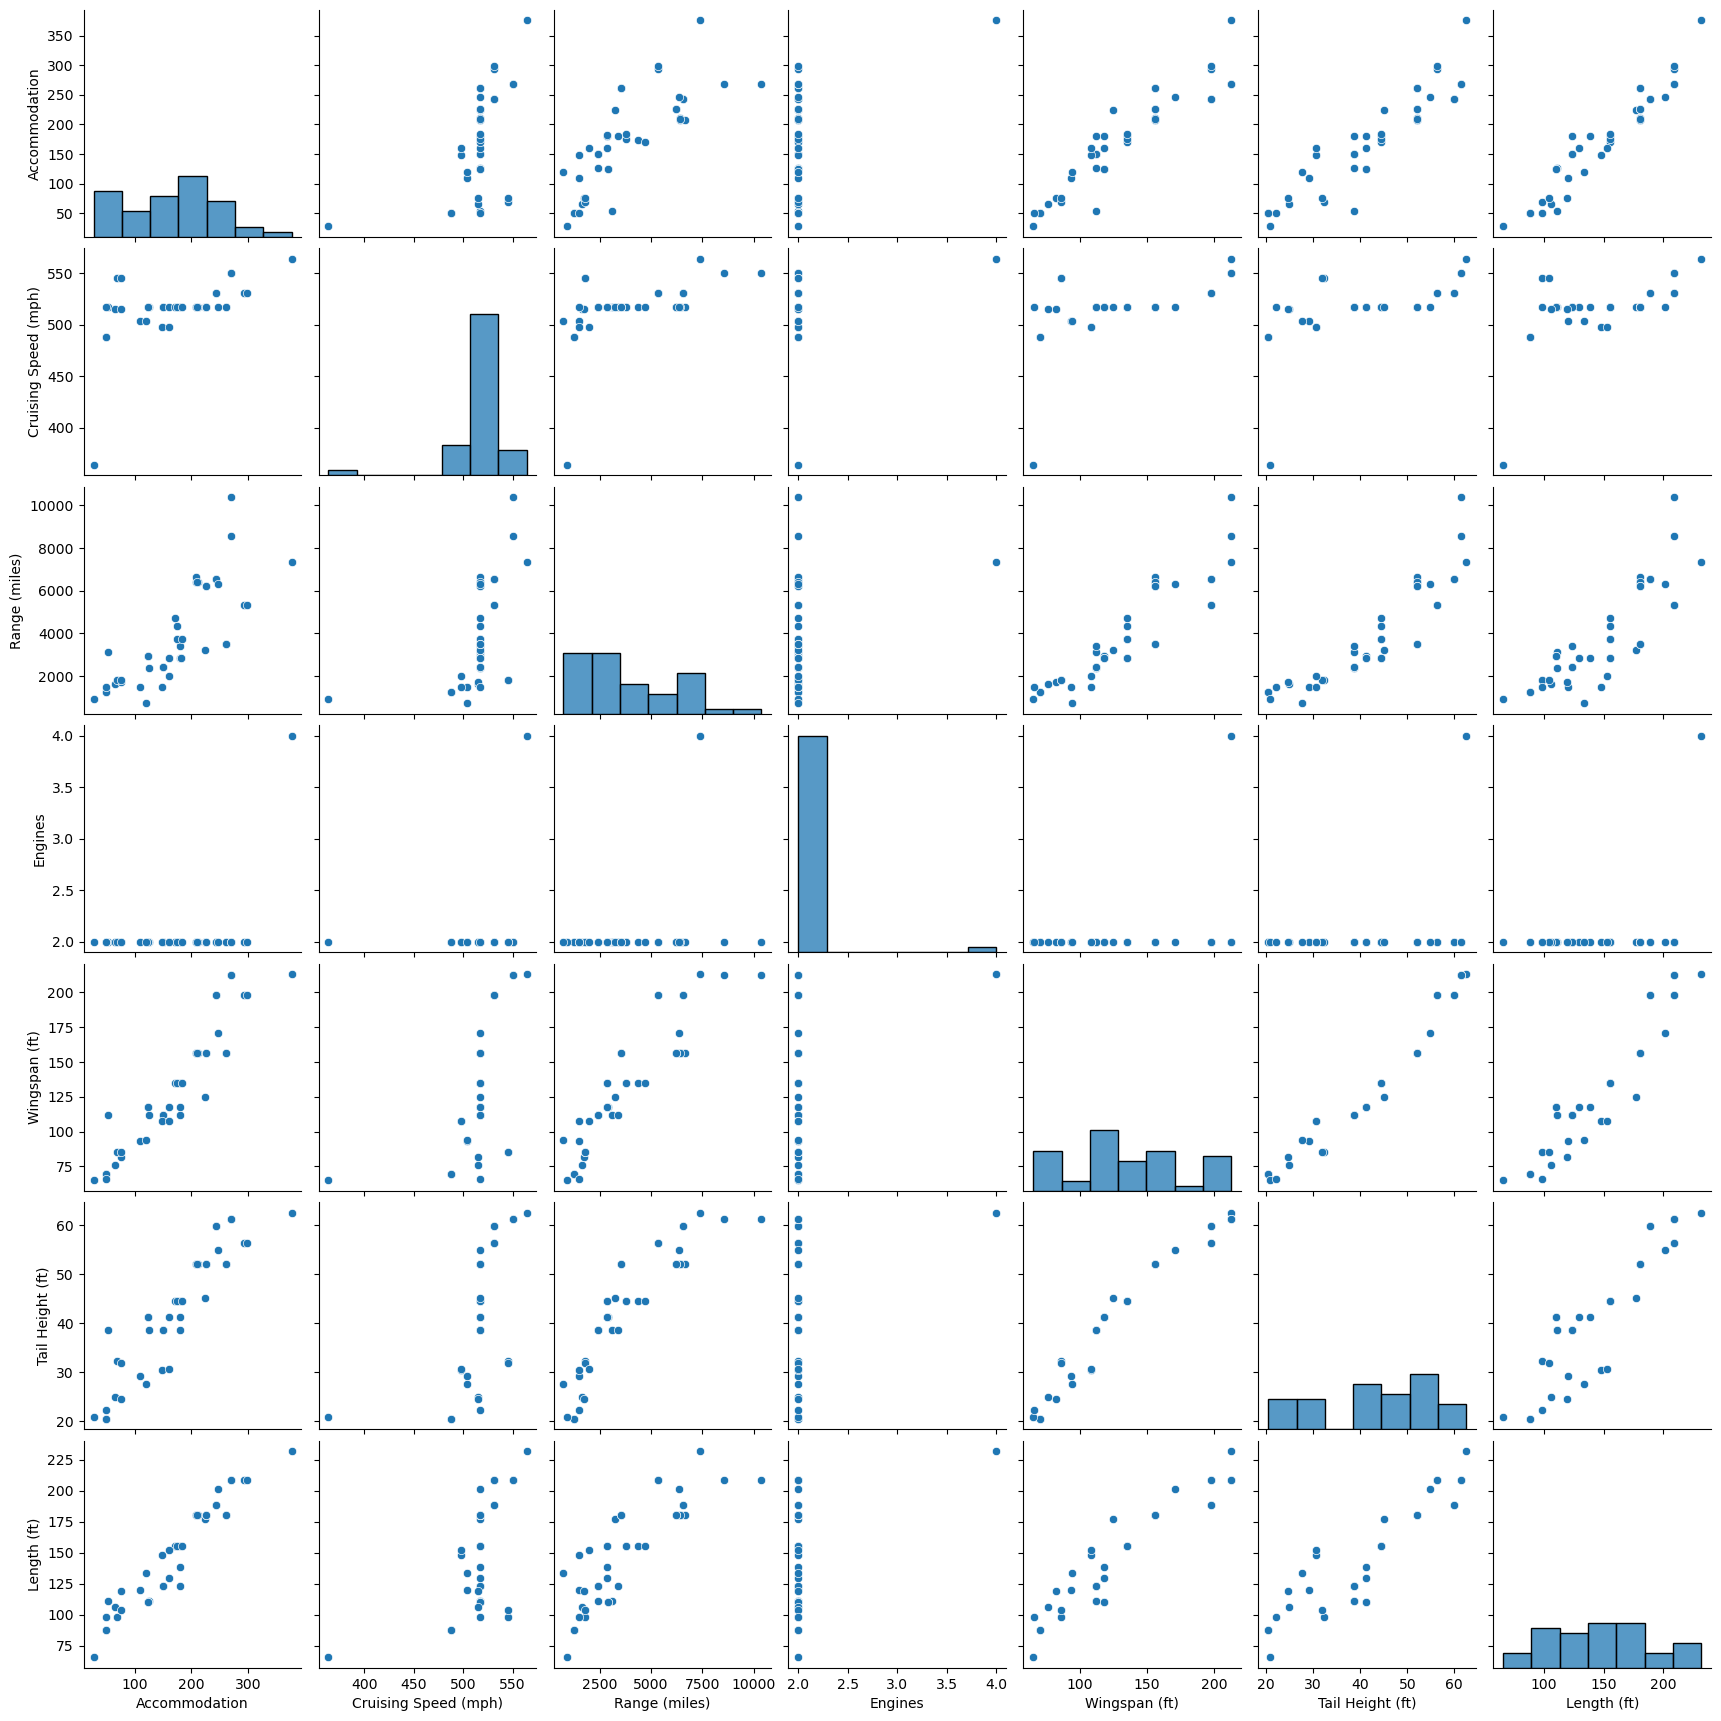

In [9]:
# Extract the specified columns (16-23)
columns = delta_data.iloc[:, 16:23]
sns.pairplot(columns)
plt.show()

### Prepare the X dataframe
Identify all binary columns and generate a dataframe ``X`` removing these binary columns and column ``Aircraft`` (since this is the ``y``)

In [10]:
# Identify binary columns
binary_columns = [col for col in delta_data.columns if delta_data[col].nunique() == 2 and set(delta_data[col].unique()) == {0, 1}]
binary_columns

['Wifi',
 'Video',
 'Power',
 'Satellite',
 'Flat-bed',
 'Sleeper',
 'Club',
 'First Class',
 'Business',
 'Eco Comfort',
 'Economy']

In [11]:
# Generate a DataFrame X removing binary columns and the 'Aircraft' column
X = delta_data.drop(columns=binary_columns + ['Aircraft'])
X.columns

Index(['Seat Width (Club)', 'Seat Pitch (Club)', 'Seat (Club)',
       'Seat Width (First Class)', 'Seat Pitch (First Class)',
       'Seats (First Class)', 'Seat Width (Business)', 'Seat Pitch (Business)',
       'Seats (Business)', 'Seat Width (Eco Comfort)',
       'Seat Pitch (Eco Comfort)', 'Seats (Eco Comfort)',
       'Seat Width (Economy)', 'Seat Pitch (Economy)', 'Seats (Economy)',
       'Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines',
       'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)'],
      dtype='object')

### Implement PCA
1. Standardize X
2. conduct PCA 
3. calculate the amount of variance each principal component explain, as well as the cumulative sum
4. visualize the cumulative sum of explained variance and set the xticks as the number of components


In [12]:
# Standardize X
X_normalized = StandardScaler().fit_transform(X)

In [13]:
# Conduct PCA
pca = PCA().fit(X_normalized)

In [14]:
# the amount of varialce each principal component explain
exp_var = pca.explained_variance_ratio_ 
exp_var

array([4.63148487e-01, 2.51071052e-01, 1.61265689e-01, 4.68733864e-02,
       3.60892657e-02, 1.84418981e-02, 9.47340752e-03, 4.34022199e-03,
       3.28954319e-03, 1.43450053e-03, 1.20846026e-03, 9.51526552e-04,
       7.88782498e-04, 6.43276642e-04, 3.88597783e-04, 2.71942151e-04,
       1.68280380e-04, 1.11848384e-04, 2.93264482e-05, 1.05081889e-05,
       3.95406440e-33, 2.05037237e-34])

In [15]:
# cumulative sum of variance explained
exp_var_cumsum = np.cumsum(exp_var)
exp_var_cumsum

array([0.46314849, 0.71421954, 0.87548523, 0.92235861, 0.95844788,
       0.97688978, 0.98636318, 0.99070341, 0.99399295, 0.99542745,
       0.99663591, 0.99758744, 0.99837622, 0.9990195 , 0.99940809,
       0.99968004, 0.99984832, 0.99996017, 0.99998949, 1.        ,
       1.        , 1.        ])

In [16]:
# count how many number in the array
len(exp_var_cumsum)

22

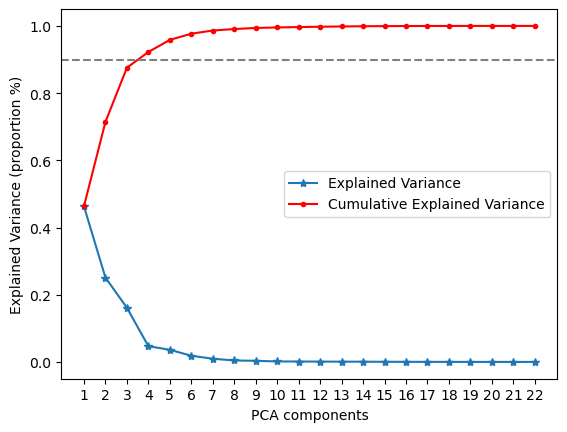

In [17]:
# visualize the cumulative sum of explained variance and set the xticks as the number of components
plt.plot(range(1, len(exp_var)+1),
        exp_var,'*-',label='Explained Variance')

plt.plot(range(1, len(exp_var)+1),
        exp_var_cumsum,'r.-',label='Cumulative Explained Variance')



plt.legend()
ax = plt.gca()
ax.set_xticks(range(1,len(exp_var)+1))
ax.set_xlabel('PCA components')
ax.set_ylabel('Explained Variance (proportion %)')

# which shows that the first two PCs accounts for more than 90% of the variance of the data.
plt.axhline(0.9,linestyle='--',color='grey')

### Clustering Analysis

After simplifying the complex data set into a lower dimensional space, I use clustering to find patterns in the data and the aircraft which are most similar? 

1. Pick the number of components which explain 90% of the variation and represent the transformed data (projected onto the selected principal components) as ``components``

2. Use ``components`` as the input, run k-means for k from ``2`` to ``15`` (with ``random_state=1``), and visualize SSE by elbow curve.

3. Select the best k using elbow curve and run clustering with the selected k to get the cluster assignment

4. Visualize the cluster membership by scatter plots (for each pair of principle components as ``x`` and ``y`` axes)



In [18]:
# Find the number of components that explain at least 90% of the variance
num_components = np.argmax(exp_var_cumsum >= 0.9) + 1

# Transform the data using the selected number of components
X_transformed = pca.transform(X_normalized)[:, :num_components]

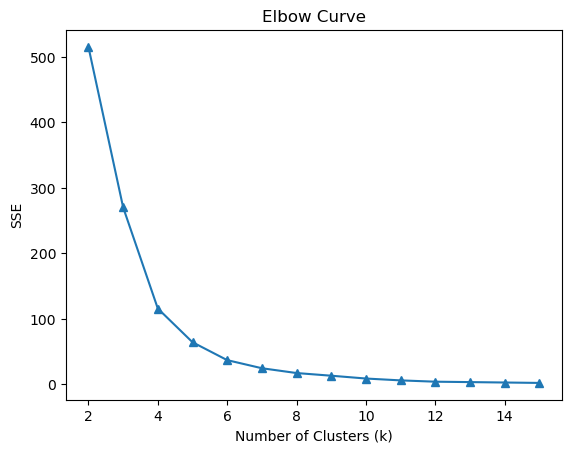

In [19]:
# Run k-means for k from 2 to 15 and visualize SSE by elbow curve
from sklearn.cluster import KMeans
sse = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_transformed)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 16), sse, '^-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Curve')
plt.show()

In [20]:
# Select the best k using elbow curve and run clustering with the selected k to get the cluster assignment
# Use K=6
cluster_model=KMeans(6, random_state= 1)
cls_assignment = cluster_model.fit_predict(X_transformed)

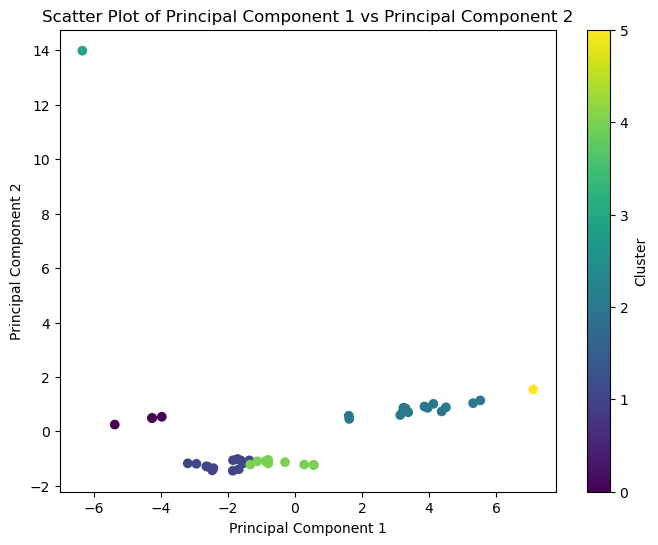

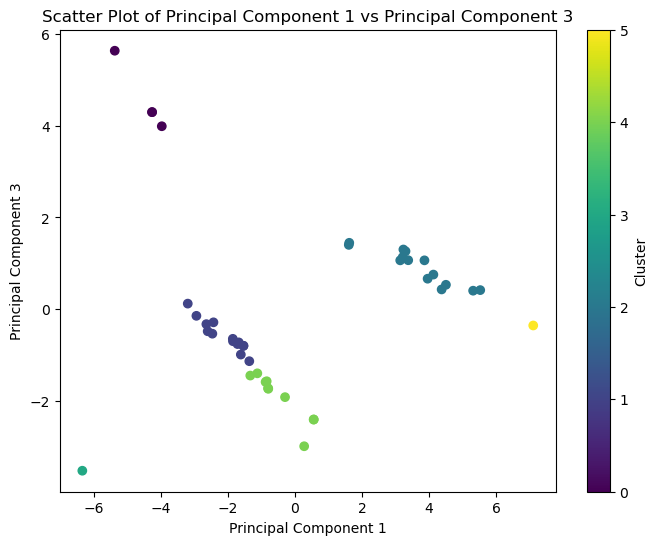

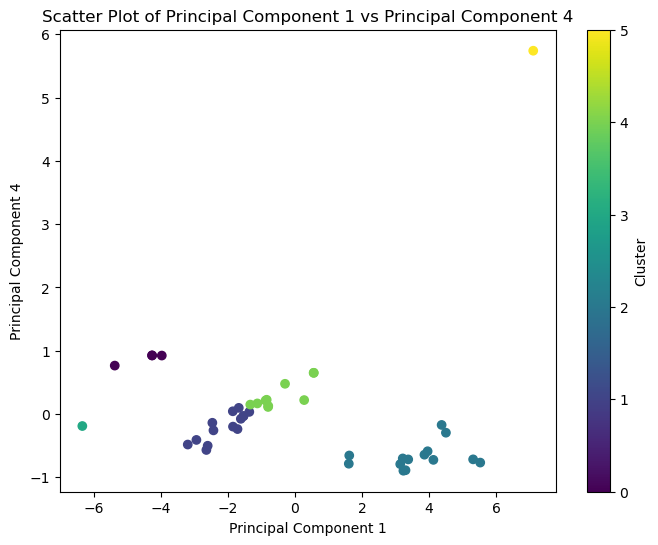

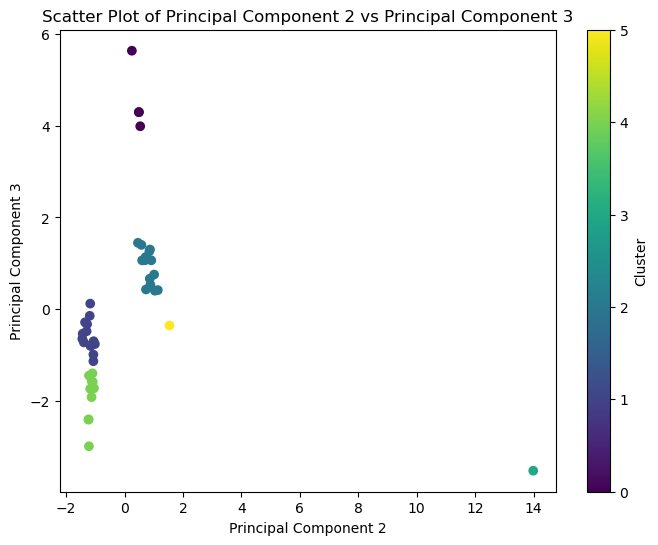

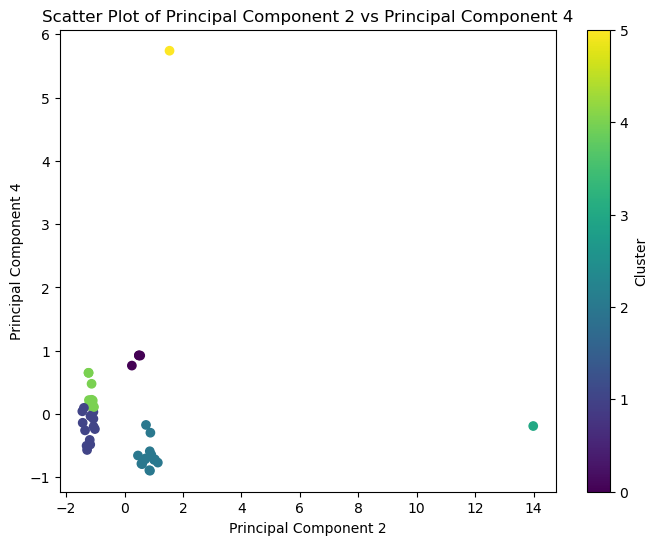

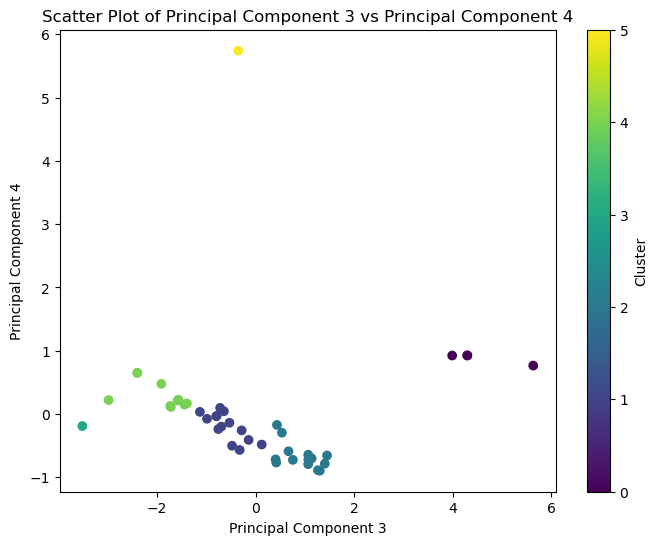

In [22]:
# Visualize the cluster membership by scatter plots (for each pair of principle components as x and y axes)
k = 6

# Fit KMeans model
cluster_model.fit(X_transformed)

# Assign cluster labels to each data point
labels = cluster_model.labels_

# Create scatter plots for each pair of principal components
for i in range(X_transformed.shape[1]):
    for j in range(i + 1, X_transformed.shape[1]):
        plt.figure(figsize=(8, 6))
        plt.scatter(X_transformed[:, i], X_transformed[:, j], c=labels, cmap='viridis')
        plt.xlabel(f'Principal Component {i+1}')
        plt.ylabel(f'Principal Component {j+1}')
        plt.title(f'Scatter Plot of Principal Component {i+1} vs Principal Component {j+1}')
        plt.colorbar(label='Cluster')
        plt.show()